# Hands On - Predicting Customer Churn - Introduction to Classification

# Import & Prepare Data

In [1]:
import pandas as pd
churn = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/churn.csv")

## Check Structure of Data

In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4863 non-null   int64  
 1   annualincome         4863 non-null   int64  
 2   calldroprate         4863 non-null   float64
 3   callfailurerate      4863 non-null   float64
 4   customersuspended    4863 non-null   object 
 5   education            4863 non-null   object 
 6   gender               4863 non-null   object 
 7   homeowner            4863 non-null   object 
 8   maritalstatus        4863 non-null   object 
 9   monthlybilledamount  4863 non-null   int64  
 10  complaints           4863 non-null   int64  
 11  unpaidmonths         4863 non-null   int64  
 12  timetoexpiration     4863 non-null   int64  
 13  occupation           4863 non-null   object 
 14  penaltytoswitch      4863 non-null   int64  
 15  lastmonthusage       4863 non-null   i



*   No missing data
*   23 Features
* Some features are objects (text data). We need to transform them because scikit-learn cannot work with them



In [3]:
churn.head()

,age,annualincome,calldroprate,callfailurerate,customersuspended,education,gender,homeowner,maritalstatus,monthlybilledamount,...,occupation,penaltytoswitch,lastmonthusage,unpaidbalance,usesinternetservice,usesvoiceservice,outsidecalls,totalcallduration,avgcallduration,churn
0,40,211044,0.05,0.00,Yes,High School or below,Female,Yes,Married,47,...,Technology Related Job,92,161,87,No,No,0.34,1506,753,0
1,33,130019,0.06,0.02,Yes,Bachelor or equivalent,Male,Yes,Married,3,...,Technology Related Job,230,43,66,No,No,0.04,2938,419,0
2,17,189354,0.03,0.00,Yes,High School or below,Female,Yes,Single,103,...,Technology Related Job,382,420,151,No,No,0.46,396,396,1
3,70,180563,0.03,0.02,Yes,High School or below,Male,Yes,Single,63,...,Others,30,93,244,No,No,0.41,248,248,0
4,18,1460,0.06,0.01,Yes,High School or below,Male,Yes,Single,58,...,Others,238,200,215,No,Yes,0.45,2129,532,1


## Separate Features and Labels

In [4]:
X = churn.drop("churn",axis=1) # Features
y = churn["churn"] # Target variable

In [5]:
y

0       0
1       0
2       1
3       0
4       1
       ..
4858    0
4859    0
4860    0
4861    0
4862    1
Name: churn, Length: 4863, dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4863 non-null   int64  
 1   annualincome         4863 non-null   int64  
 2   calldroprate         4863 non-null   float64
 3   callfailurerate      4863 non-null   float64
 4   customersuspended    4863 non-null   object 
 5   education            4863 non-null   object 
 6   gender               4863 non-null   object 
 7   homeowner            4863 non-null   object 
 8   maritalstatus        4863 non-null   object 
 9   monthlybilledamount  4863 non-null   int64  
 10  complaints           4863 non-null   int64  
 11  unpaidmonths         4863 non-null   int64  
 12  timetoexpiration     4863 non-null   int64  
 13  occupation           4863 non-null   object 
 14  penaltytoswitch      4863 non-null   int64  
 15  lastmonthusage       4863 non-null   i

## Recode pandas "objects"

"Objects" in Pandas are textual variables. Sklearn cannot work with them. We have to recode them

In [7]:
churn["occupation"].unique() #unique returns the unique values for a variable

array(['Technology Related Job', 'Others', 'Non-technology Related Job'],
      dtype=object)

### One-hot encoding

In [8]:
X_onehot = pd.get_dummies(X, drop_first = False)
X_onehot.head()

,age,annualincome,calldroprate,callfailurerate,monthlybilledamount,complaints,unpaidmonths,timetoexpiration,penaltytoswitch,lastmonthusage,...,homeowner_Yes,maritalstatus_Married,maritalstatus_Single,occupation_Non-technology Related Job,occupation_Others,occupation_Technology Related Job,usesinternetservice_No,usesinternetservice_Yes,usesvoiceservice_No,usesvoiceservice_Yes
0,40,211044,0.05,0.00,47,3,6,76,92,161,...,1,1,0,0,0,1,1,0,1,0
1,33,130019,0.06,0.02,3,2,6,62,230,43,...,1,1,0,0,0,1,1,0,1,0
2,17,189354,0.03,0.00,103,0,7,99,382,420,...,1,0,1,0,0,1,1,0,1,0
3,70,180563,0.03,0.02,63,3,2,18,30,93,...,1,0,1,0,1,0,1,0,1,0
4,18,1460,0.06,0.01,58,1,3,99,238,200,...,1,0,1,0,1,0,1,0,0,1


Check out feature "customer_suspended". Due to the onehot encoding there is now a "customer_suspended_Yes" and a "customer_suspended_No" version. Of course, both variables contain the same information.

### Dummy coding

In [9]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,annualincome,calldroprate,callfailurerate,monthlybilledamount,complaints,unpaidmonths,timetoexpiration,penaltytoswitch,lastmonthusage,...,education_High School or below,education_Master or equivalent,education_PhD or equivalent,gender_Male,homeowner_Yes,maritalstatus_Single,occupation_Others,occupation_Technology Related Job,usesinternetservice_Yes,usesvoiceservice_Yes
0,40,211044,0.05,0.00,47,3,6,76,92,161,...,1,0,0,0,1,0,0,1,0,0
1,33,130019,0.06,0.02,3,2,6,62,230,43,...,0,0,0,1,1,0,0,1,0,0
2,17,189354,0.03,0.00,103,0,7,99,382,420,...,1,0,0,0,1,1,0,1,0,0
3,70,180563,0.03,0.02,63,3,2,18,30,93,...,1,0,0,1,1,1,1,0,0,0
4,18,1460,0.06,0.01,58,1,3,99,238,200,...,1,0,0,1,1,1,1,0,0,1


Adding the argument "drop_first = True" deletes the redundant features.

Some algorithms have problems with dealing with the redundant information (e.g. linear models). Thus, dummy coding is a safer bet without loosing any information (= preferred choice)

Bet we now have a bigger number of features



In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                4863 non-null   int64  
 1   annualincome                       4863 non-null   int64  
 2   calldroprate                       4863 non-null   float64
 3   callfailurerate                    4863 non-null   float64
 4   monthlybilledamount                4863 non-null   int64  
 5   complaints                         4863 non-null   int64  
 6   unpaidmonths                       4863 non-null   int64  
 7   timetoexpiration                   4863 non-null   int64  
 8   penaltytoswitch                    4863 non-null   int64  
 9   lastmonthusage                     4863 non-null   int64  
 10  unpaidbalance                      4863 non-null   int64  
 11  outsidecalls                       4863 non-null   float

# Train and Plot a First Decision Tree


## 1) Import Model Function

In [11]:
from sklearn.tree import DecisionTreeClassifier

## 2) Instantiate Model

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", 
                              max_depth=2)

Used hyperparameters:

* **criterion="entropy":** using informatin gain as measure for splitting
* **max_depth:** allowed number of maximum splits



## 3) Fit Model to Data

In [13]:
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

## 4) Make Predictions

.predict() gets the predicted class. Sklearn is using a default threshold of 0.5. Every predicted probability that is higher is set to 1. Eevery predicted propability that is smaller is set to 0.

In [14]:
tree.predict(X)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

We can also get the predicted probabilities with .preedict_proba(). We get two columents: One for the negative class (remain) and one for the positive class (churn). Both values sum up two 1. 

The positive class is in the second columm: 

In [15]:
tree.predict_proba(X)

array([[0.5392279 , 0.4607721 ],
       [0.47670549, 0.52329451],
       [0.47670549, 0.52329451],
       ...,
       [0.5392279 , 0.4607721 ],
       [0.5392279 , 0.4607721 ],
       [0.47670549, 0.52329451]])

## Plot Decision Tree

The following function can be used to draw a DecistionTreeClassifier Model:

In [16]:
def plot_tree_classification(treemodel, X):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,class_names=['0','1'],feature_names = X.columns,proportion=True,precision=2)

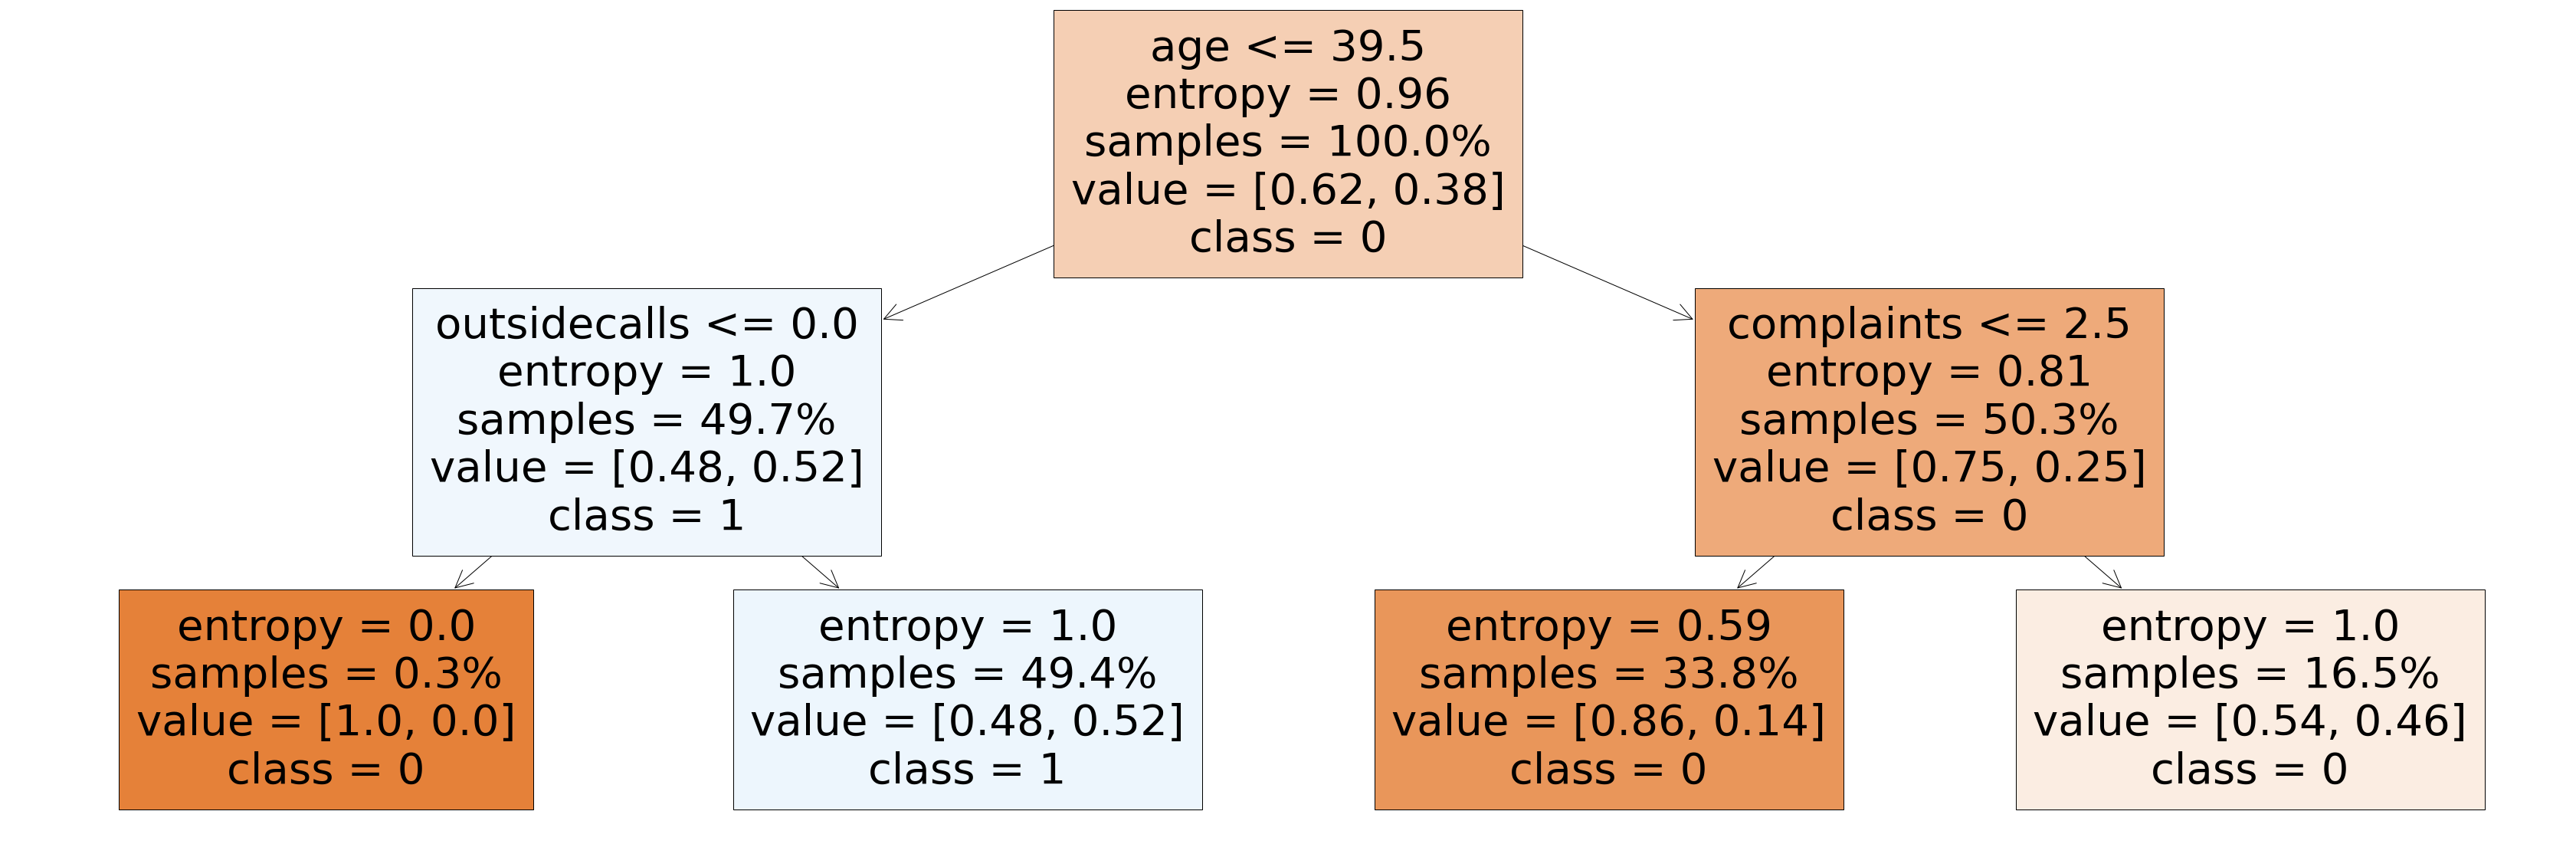

In [17]:
plot_tree_classification(tree, X)

## Check out other Hyperparameters - How is the tree affected?


Hyperparameters to vary

* **max_depth:** allowed number of maximum splits
* **min_samples_leaf:** The minimum number of samples required to be at a leaf node. Split will be considered if each child leave has at least min_sample_leaf instances.
* **min_samples_split:** The minimum number of instances required to split an internal node. Must be at least 2.






*  Increasing max_depth: ____
*  Increasing min_samples_leaf and min_samples_split: ____



In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", 
                              max_depth=3,
                              min_samples_split=2,
                              min_samples_leaf=4)
tree = tree.fit(X,y)
plot_tree_classification(tree, X)

# Evaluate Accuracy of Classifier

## 1) Import Model Functions

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2) Instantiate Model

In [ ]:
tree_train = DecisionTreeClassifier(criterion="entropy", 
                                    max_depth=4)

## 3) Create Test & Training Data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


*   **X:** Features to be split into testing and training data
*   **y:** Labels to be split into testing and training data
*   **test_size:** proportion of the dataset in the test data; usually ~ 30%
*   **random_state:** seed for making results reproducible. Instances are randomly distributed among testing and training data. However, every computer splits randomly in a different fashion. Providing a seed, makes results reproducible because with the same seed, all computers split the data in the same fashion.




We can use the .shape method to investigate whether data splitting has been succesfull

In [ ]:
X.shape #4863 instances and 25 variables in the entire dataset

In [ ]:
X_train.shape #3404 instances and 25 variables in the training dataset

In [ ]:
X_test.shape #1459 instances and 25 variables in the training dataset

## 4) Fit Model to Training Data


In [ ]:
tree_train.fit(X_train, y_train)

## 5) Make Predictions on Testing Data


In [ ]:
y_pred = tree_train.predict(X_test)
y_pred

## 6) Score Accuracy

In [ ]:
accuracy_score(y_test, y_pred)

## Determining "The Sunshine Spot"

Calculate the accuracy of the decision tree for a “max_depth“ of 10, 20, 30, 40, 50!

In [ ]:
tree_train = DecisionTreeClassifier(criterion="entropy", max_depth=50, random_state=12)
tree_train.fit(X_train, y_train)
y_pred = tree_train.predict(X_test)
accuracy_score(y_test, y_pred)

We provide random_state = 12 such that we all get identical results. The seed (=number) itself does not matter, it just has to be the same!

# Evaluating Model Performance the Data Scientist Way

## Accuracy Paradox

In [ ]:
len(y_test)

In [ ]:
accuracy_score(y_test,[0]*1459)

## Instantiating a new model at the "sunshine spot"

In [ ]:
tree_educatedguess = DecisionTreeClassifier(criterion="entropy", 
                              max_depth=30,
                              min_samples_leaf=50,
                              random_state=12)
tree_educatedguess.fit(X_train, y_train)
y_pred = tree_educatedguess.predict(X_test)

min_samples_leaf=50 is added for didactical reasons to show a specific effect

## Get confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

- True Negatives = 696
- False Positives = 229
- False Negatives = 269
- True Positives = 265

## Calculating accuracy

In [ ]:
(696 + 265) / (696 + 265 + 229 + 269)

## Calculating Recall / Sensitivity

- True Positives / (True Positives + False Negatives) 
- Recall / Sensitivity = Proportion of churning customers that we can detect!

In [ ]:
265 / (265 + 269)

## Calculate Precision

- True Positives / (True Positives + False Positives)
- Precision = If we flag a customer as churning, what is the chance that this is correct? 

In [ ]:
265 / (265 + 229)

## Specificity

- True Negatives / (True Negatives + False Positives)
- Specificity = Proportion of not churning customers that we can identify
- False Alarm = 1 - Specificity

In [ ]:
696 / (696 + 229)

## Classification Report - Getting it all at once

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Additional measures:


*   **F1-Score:** (harmonic) mean of precision and recall >> very good measure for "overall accuracy" as it balances precision and recall
*   **Support:** Number of instances that churn (1) / not churn (0)



## Variying the threshold for classification


By default a class probability of > 0.5 determines a customer as churning!

using .predict_proba() we can get predicted probabilities and try out own tresholds:

In [ ]:
tree_educatedguess.predict_proba(X_test)

In [ ]:
y_pred =  (tree_educatedguess.predict_proba(X_test)[:, 1] > 0.1).astype(int)
print(classification_report(y_test, y_pred))

* This model has lower accuracy
* Perfect Recall (all churning customers can be identified)
* Low Precision (Only 49% of predictions are correct)

The threshold of 0.1 is very low, each customer with probability of churning than > 10% is flagged as churning (a quite optimistic model)

In [ ]:
y_pred =  (tree_educatedguess.predict_proba(X_test)[:, 1] > 0.7).astype(int)
print(classification_report(y_test, y_pred))

* This model has higher accuracy
* Lower Recall (only 30% of churning customers are identified)
* Higher Precision (59%)

The threshold of 0.7 is quite strict, only customers with probability of churning than > 70% are flagged as churning (a quite conservative model)

## ROC and AUC - Model performance independent of threshold

In [ ]:
def plot_ROC(model, X_test, y_test):
  import matplotlib.pyplot as plt
  from sklearn.metrics import RocCurveDisplay
  tree_ROC = RocCurveDisplay.from_estimator(model, X_test, y_test, color='green', linewidth=3)
  plt.title('ROC Curve')
  plt.xlabel('False Alarm (1 - Specificity)')
  plt.ylabel('Recall (Sensitivity)')
  plt.show()

In [ ]:
plot_ROC(tree_educatedguess, X_test, y_test)

# Strategies for Improving Model Performance

## Strategy 1: Finding the best model - Hyperparameter Tuning & Cross validation

### 1) Import model functions

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 2) Instantiate Model with Cross-Validation Setup

In [44]:
parameters = {'max_depth':range(1,30), 
              'min_samples_leaf':[1, 10, 20, 30, 50, 100]}
tree_CV = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=1), parameters, cv=5)

*  **cv** number of cross validation folds

How many Models are calculated?

In [45]:
29*6*5

870

### 3) Fit Model to Data using Cross validation 

In [46]:
tree_CV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'max_depth': range(1, 30),
                         'min_samples_leaf': [1, 10, 20, 30, 50, 100]})

In [47]:
tree_CV.best_params_

{'max_depth': 25, 'min_samples_leaf': 1}

### 4) Make Prediction

In [48]:
y_pred = tree_CV.predict(X_test)

### 5) Evaluate Model

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       925
           1       0.63      0.77      0.69       534

    accuracy                           0.75      1459
   macro avg       0.74      0.75      0.74      1459
weighted avg       0.77      0.75      0.75      1459



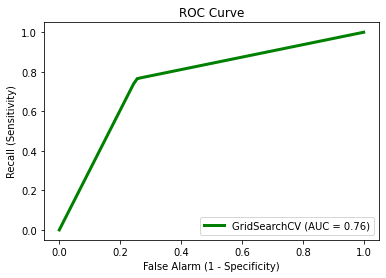

In [50]:
plot_ROC(tree_CV, X_test, y_test)

## Strategy 2: Building Many Models - Ensembling (Random Forests)

### 1) Import Model Functions

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 2) Instantiate Model

In [52]:
forest = RandomForestClassifier(n_estimators=1000)

* **n_estimators** = Number of Decision Trees in the forest

### 3) Create test and training data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 4) Fit Model to Training Data

In [54]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

### 5) Make Prediction on Testing Data

In [55]:
y_pred = forest.predict(X_test)

### 6) Evaluate Performance 

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       925
           1       0.77      0.80      0.78       534

    accuracy                           0.84      1459
   macro avg       0.82      0.83      0.83      1459
weighted avg       0.84      0.84      0.84      1459



Clear improvement over cross-validated tree in every performance metrics -> way better model

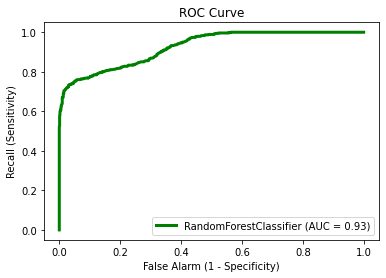

In [57]:
plot_ROC(forest, X_test, y_test)

### Determine Variable Importances

In [58]:
def plot_variable_importance(model, X_train):
  import pandas as pd
  import matplotlib.pyplot as plt
  importances = pd.Series(data=model.feature_importances_,
                          index=X_train.columns)
  importances.sort_values().plot(kind='barh', color="#00802F")
  plt.title('Features Importances')

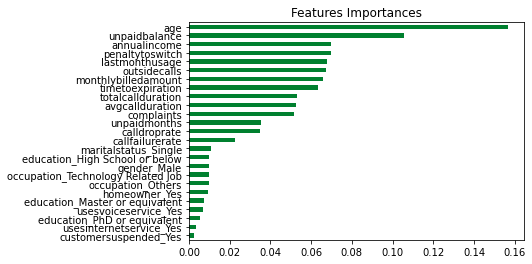

In [59]:
plot_variable_importance(forest, X_train)

## Strategy 3: Learning from Past Prediction Errors - Boosting

### 1) Import Model Functions

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 2) Instantiate Model

In [61]:
boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5)

*  **n_estimators:** number of bosted decision trees
*  **learning_rate:** degree to which predictions are updated after each round (usually rather small number between 0.01 and 1)



### 3) Create Test & Training Data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 4) Fit Model to Training Data

In [63]:
boost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=1000)

### 5) Make Predictions on Testing Data 

In [64]:
y_pred = boost.predict(X_test)

### 6) Evaluate Performance

In [65]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       833
           1       0.83      0.71      0.76       626

    accuracy                           0.81      1459
   macro avg       0.82      0.80      0.80      1459
weighted avg       0.81      0.81      0.81      1459



Higher pricision, but lower recall than random forest > usage depends on business context (cancer or spam?)

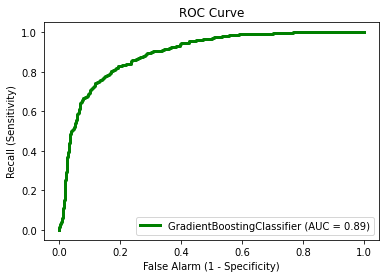

In [66]:
plot_ROC(boost,X_test,y_test)